# 05. Exploratory Data Analysis

### Importando as bibliotecas

In [1]:
import sys
sys.path.append('..')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import functions.fn_stats as fn_stats
import functions.fn_charts as fn_charts
import params.consts as consts

### Lendo o dataset tratado e visualizando o overview atual

In [2]:
df = pd.read_csv(consts.DATASET_LEAN) # Armazenando o dataset tratado em uma variável

df # Exbindo uma visão geral do dataset

,idade,sexo,total_gasto,assinatura,duracao_contrato,tempo_como_cliente,frequencia_uso,ligacoes_callcenter,dias_atraso,meses_ultima_interacao,cancelou
0,30.0,Female,932.00,Standard,Annual,39.0,14.0,5.0,18.0,17.0,1.0
1,65.0,Female,557.00,Basic,Monthly,49.0,1.0,10.0,8.0,6.0,1.0
2,55.0,Female,185.00,Basic,Quarterly,14.0,4.0,6.0,18.0,3.0,1.0
3,58.0,Male,396.00,Standard,Monthly,38.0,21.0,7.0,7.0,29.0,1.0
4,23.0,Male,617.00,Basic,Monthly,32.0,20.0,5.0,8.0,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
881654,42.0,Male,716.38,Premium,Annual,54.0,15.0,1.0,3.0,8.0,0.0
881655,25.0,Female,745.38,Premium,Annual,8.0,13.0,1.0,20.0,2.0,0.0
881656,26.0,Male,977.31,Standard,Quarterly,35.0,27.0,1.0,5.0,9.0,0.0
881657,28.0,Male,602.55,Standard,Quarterly,55.0,14.0,2.0,0.0,2.0,0.0


In [3]:
df.info() # Exibindo as informações das variáveis do dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881659 entries, 0 to 881658
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   idade                   881659 non-null  float64
 1   sexo                    881659 non-null  object 
 2   total_gasto             881659 non-null  float64
 3   assinatura              881659 non-null  object 
 4   duracao_contrato        881659 non-null  object 
 5   tempo_como_cliente      881659 non-null  float64
 6   frequencia_uso          881659 non-null  float64
 7   ligacoes_callcenter     881659 non-null  float64
 8   dias_atraso             881659 non-null  float64
 9   meses_ultima_interacao  881659 non-null  float64
 10  cancelou                881659 non-null  float64
dtypes: float64(8), object(3)
memory usage: 74.0+ MB


In [4]:
fn_stats.describe(df) # Usando a função que exibe as estatísticas das colunas numéricas

,idade,total_gasto,tempo_como_cliente,frequencia_uso,ligacoes_callcenter,dias_atraso,meses_ultima_interacao,cancelou
count,881659.00,881659.00,881659.00,881659.00,881659.00,881659.00,881659.00,881659.00
mean,39.37,631.62,31.26,15.81,3.60,12.97,14.48,0.57
std,12.44,240.80,17.26,8.59,3.07,8.26,8.60,0.50
min,18.00,100.00,1.00,1.00,0.00,0.00,1.00,0.00
25%,29.00,480.00,16.00,9.00,1.00,6.00,7.00,0.00
50%,39.00,661.00,32.00,16.00,3.00,12.00,14.00,1.00
75%,48.00,830.00,46.00,23.00,6.00,19.00,22.00,1.00
max,65.00,1000.00,60.00,30.00,10.00,30.00,30.00,1.00


In [5]:
df.describe(exclude='number') # Exibindo as estatísticas das colunas categóricas

,sexo,assinatura,duracao_contrato
count,881659,881659,881659
unique,2,3,3
top,Male,Standard,Annual
freq,500501,298254,354395


In [6]:
df.isnull().sum() # Somando todos os valores nulos de cada coluna

idade                     0
sexo                      0
total_gasto               0
assinatura                0
duracao_contrato          0
tempo_como_cliente        0
frequencia_uso            0
ligacoes_callcenter       0
dias_atraso               0
meses_ultima_interacao    0
cancelou                  0
dtype: int64

### Definindo as hue columns

Definindo as colunas que serão utilizadas como hue columns nas análises a seguir para gerar o máximo de insights relevantes para o projeto.

In [7]:
hue_columns = [ # Definindo as hue columns
    'cancelou', 
] 

### Criando os histplots de acordo com as hue columns, para extrair seus insights

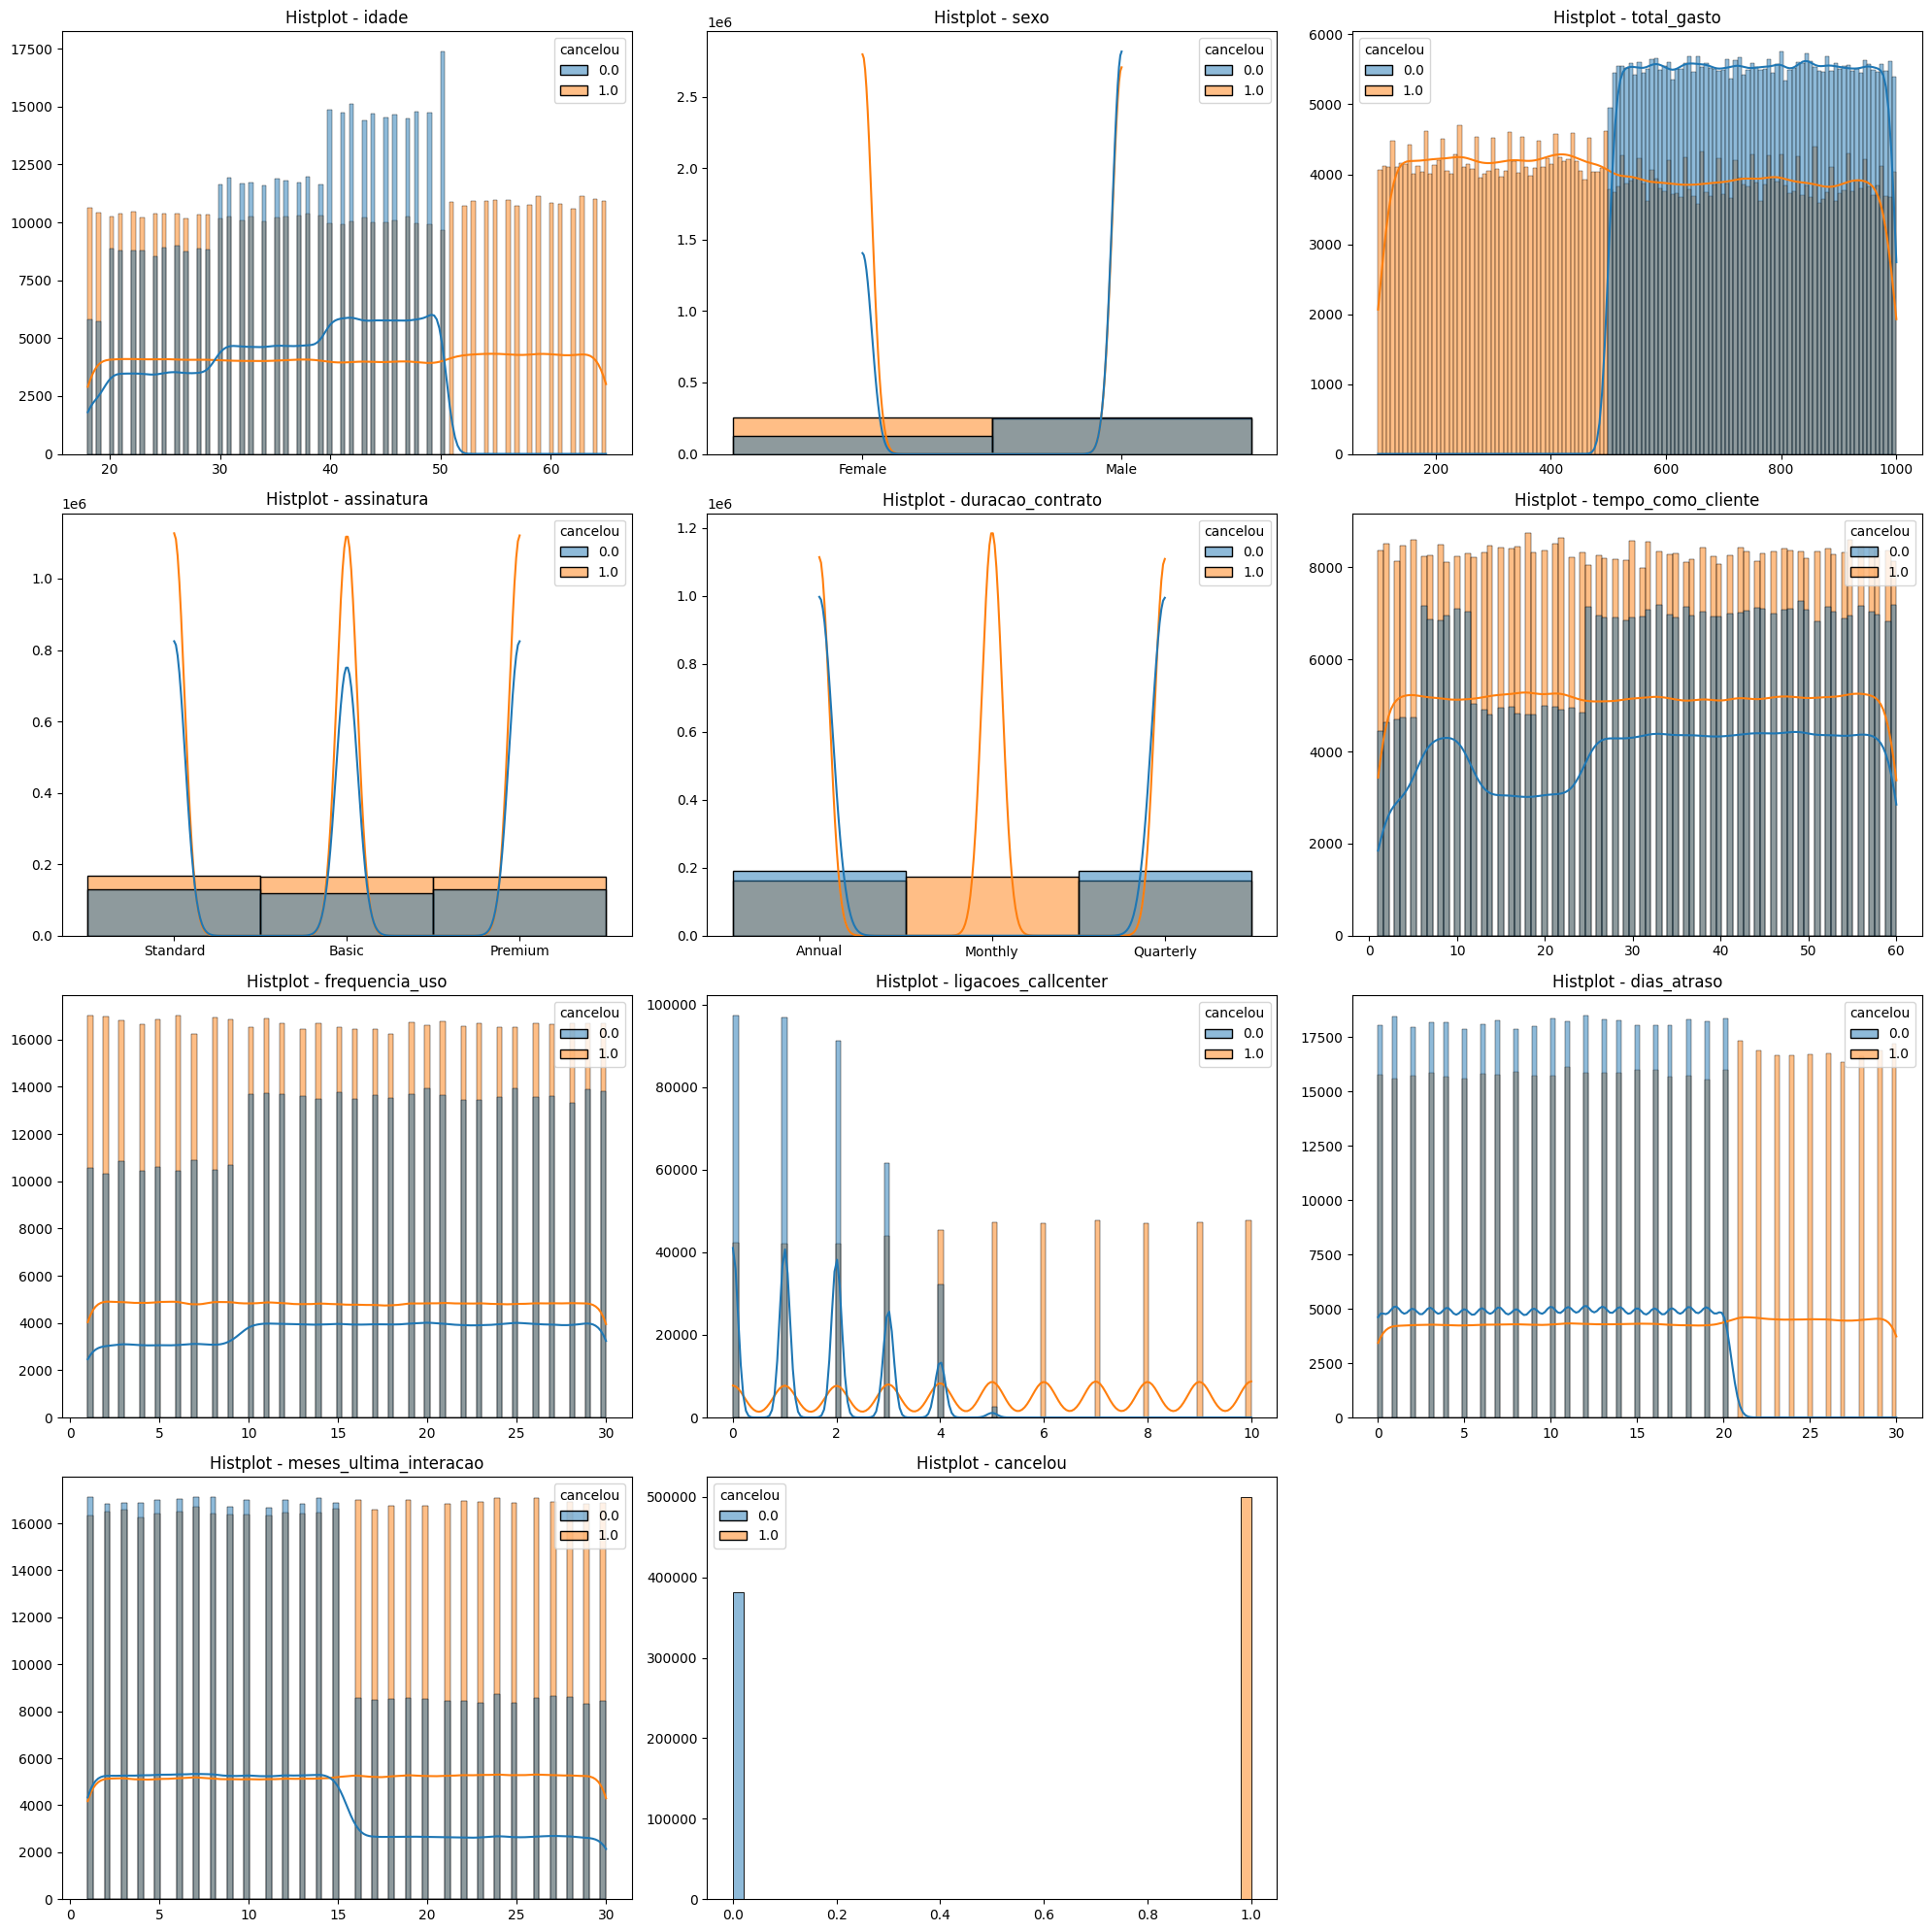

In [8]:
fn_charts.histplots(df, df.columns, hue_columns[0], kde=True) # Criando o histplot com base na lista de hue columns

### Listando os insights encontrados nos histplots

| Hue Column | Column                | Intensidade | Insight                                                                           |
|------------|-----------------------|-------------|-----------------------------------------------------------------------------------|
| cancelou   | idade                 | Evidente    | Quem cancelou, tende a ter mais de 50 anos (o contrário também)                   |
| cancelou   | total_gasto            | Evidente    | Quem cancelou, tende a ter gasto menos de 500,00 (o contrário também)             |
| cancelou   | duracao_contrato      | Evidente    | Quem cancelou, tende a ter um contrato mensal (o contrário também)                |
| cancelou   | ligacoes_callcenter   | Evidente    | Quem cancelou, tende a ligar mais de 5 vezes no callcenter (o contrário também)   |
| cancelou   | dias_atraso           | Evidente    | Quem cancelou, tende a ter mais de 20 dias de atraso no pagamento (o contrário também) |
| cancelou   | meses_ultima_interacao | Sutil       | Quem cancelou, tende a ficar mais de 15 meses sem interação (o contrário também)  |

### Armazenando as principais colunas dos insights de acordo com sua hue column

In [9]:
columns_cancelou = ['idade', 'total_gasto', 'ligacoes_callcenter', 'dias_atraso', 'meses_ultima_interacao']

### Corroborando os insights encontrados nos histplots através de boxplots

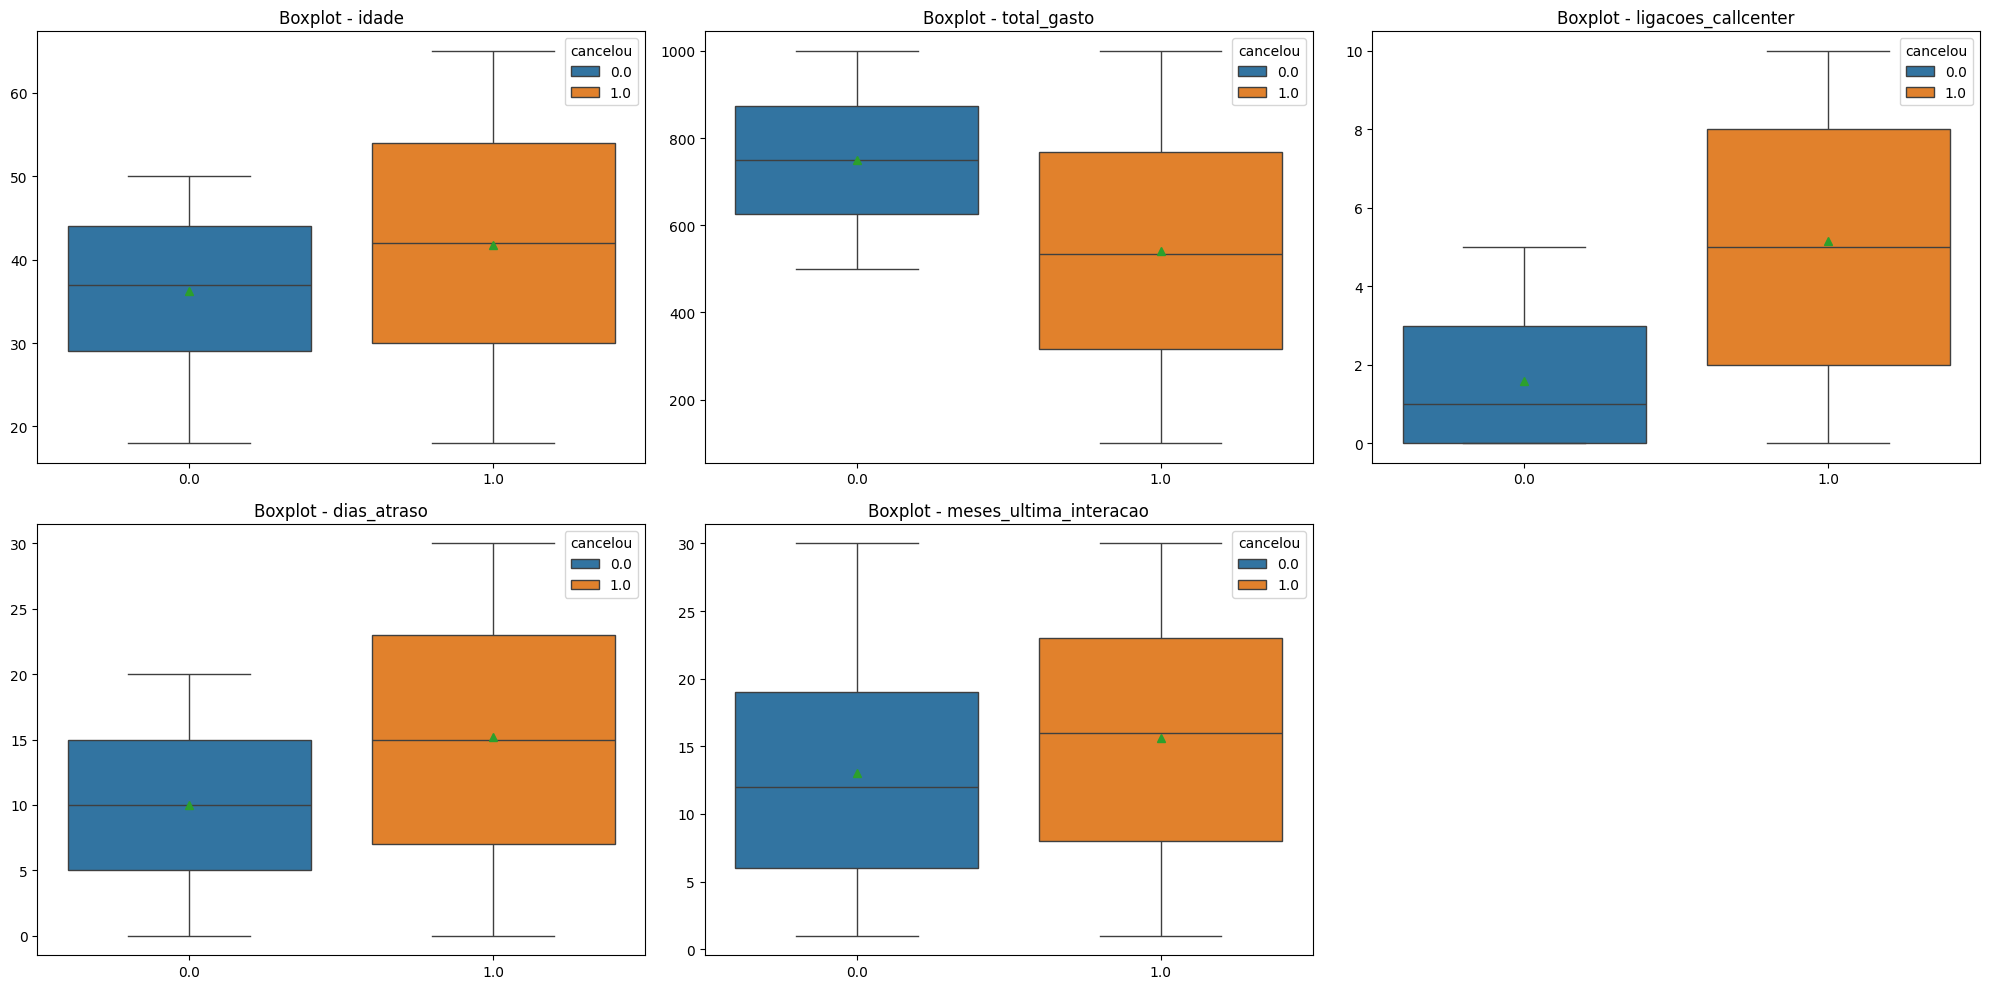

In [10]:
fn_charts.boxplots(df, columns_cancelou, hue_columns[0]) # Criando os boxplots com base nas hue columns e nas principais colunas de insight

### Corroborando os insights encontrados nos histplots através de um heatmap

In [11]:
df_dummies = pd.get_dummies(df) # Criando uma variável com o dataset dummies, que transforma variáveis categóricas em numéricas
df_heatmap = df_dummies.corr() # Criando uma variável com o dataset com dados de 0 a 1 para ser usado em um heatmap

In [12]:
df_dummies.to_csv(consts.DATASET_DUMMIES, index=False) # Salvando o dataset dummies

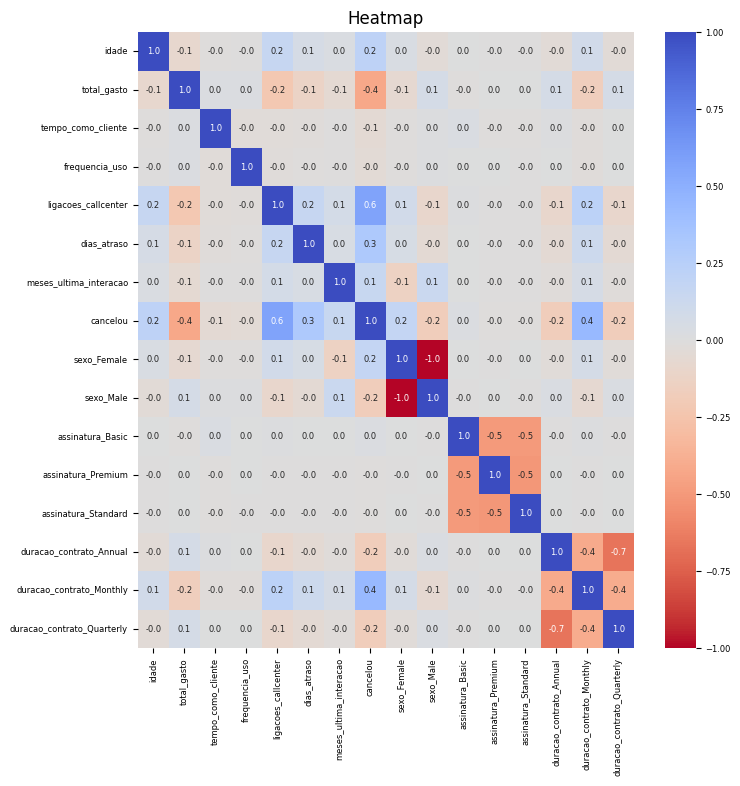

In [13]:
fn_charts.heatmap(df_heatmap) # Criando o heatmap

### Corroborando os insights encontrados nos histplots através de barplots e possivelmente gerando novos insights

In [14]:
df_heatmap_unstack = pd.DataFrame(df_heatmap.unstack()) # Fazendo o unstack do dataset do heatmap
df_heatmap_unstack = df_heatmap_unstack.rename(columns={0: 'correlation'}) # Alterando o nome da coluna de correlações

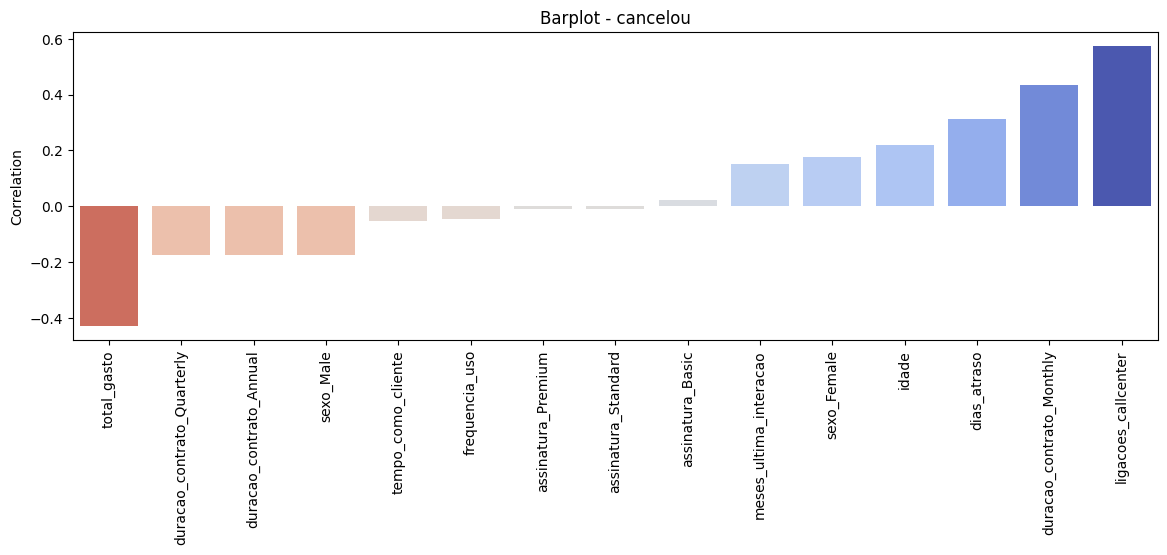

In [16]:
for column in [hue_columns[i] for i in [0]]: # Criando uma estrutura de repetição para gerar os gráficos, apenas para colunas que não eram categóricas e foram substituídas por numéricas
    corr = df_heatmap_unstack.loc[column].sort_values(by='correlation')[:-1] # Filtrando e classificando o dataset apenas pela coluna hue
    fn_charts.barplot(corr, corr['correlation'], corr['correlation'].max(), column) # Criando o gráfico com o valor máximo na escala

### Identificando os grupos com base nas análises anteriores

Nessa análise exploratória inicial, após o detalhamento dos gráficos estatísticos acima, podemos identificar 2 grupos na tabela abaixo com base nos objetivos do projeto, de forma qualitativa e quantitativa. 

| **Grupo 1**        | **Grupo 1**           | **Grupo 2**       | **Grupo 2**          |
|-----------------------------------|---------------------------------------|-----------------------------------|--------------------------------------|
| **Qualitativo**         | **Quantitativo**           | **Qualitativo**         | **Quantitativo**           |
| Mais de 50 anos                    | Idade > 50                 | Menos de 50 anos                    | Idade <= 50                     |
| Gastou menos de 500,00             | Gastos < 500               | Gastou mais de 500,00               | Gastos >= 500                   |
| Possui um contrato mensal          | Contrato = Mensal          | Possui contratos anual e trimestral | Contrato != Mensal              |
| Já ligou mais de 5 vezes no callcenter | Ligações Callcenter > 5    | Já ligou menos de 5 vezes no callcenter | Ligações Callcenter <= 5         |
| Atrasa o pagamento em mais de 20 dias | Dias de Atraso > 20        | Não atrasa o pagamento em mais de 20 dias | Dias de Atraso <= 20           |
| Fica mais de 15 meses sem interação | Meses sem Interação > 15   | Fica menos de 15 meses sem interação | Meses sem Interação <= 15        |

### Listando as sugestões de melhorias

Com base nas conclusões encontradas acima, é possível sugerir as seguintes sugestões de melhoria:
1. Visando reduzir o índice de churn, uma boa sugestão é dar uma maior atenção para evitar os cenários dos clientes Grupo 1, como dar vantagens para quem assina os contratos anuais e trimestrais, fazer um trabalho especial com a equipe de callcenter para evitar que os clientes liguem mais de 5 vezes, fazer um plano de ação com ideias para que os clientes não fiquem com mais de 20 dias de atraso no pagamento, entre outras ações

### Estimando o impacto da aplicação das sugestões de melhorias

Mostrando a evolução antes e depois de aplicar as melhorias sugeridas:

In [17]:
display(df['cancelou'].value_counts(normalize=True).map('{:.1%}'.format).sort_index()) # Verificando a porcentagem do índice de churn inicial

cancelou
0.0    43.3%
1.0    56.7%
Name: proportion, dtype: object

In [18]:
# Atualizando o dataframe conforme as sugestões apontadas  
df = df[df['idade']<=50]
df = df[df['total_gasto']>=500]
df = df[df['assinatura']!='Mensal']
df = df[df['ligacoes_callcenter']<=5]
df = df[df['dias_atraso']<=20]
df = df[df['meses_ultima_interacao']<=15]

In [19]:
display(df['cancelou'].value_counts(normalize=True).map('{:.1%}'.format).sort_index()) # Verificando a porcentagem do índice de churn posteriormente

cancelou
0.0    92.0%
1.0     8.0%
Name: proportion, dtype: object

In [20]:
df # Exibindo o dataset

,idade,sexo,total_gasto,assinatura,duracao_contrato,tempo_como_cliente,frequencia_uso,ligacoes_callcenter,dias_atraso,meses_ultima_interacao,cancelou
17,39.0,Female,577.00,Basic,Monthly,43.0,2.0,4.0,15.0,6.0,1.0
61,42.0,Male,736.00,Premium,Monthly,29.0,23.0,0.0,6.0,5.0,1.0
85,45.0,Female,699.00,Premium,Quarterly,23.0,4.0,5.0,1.0,12.0,1.0
95,32.0,Male,649.00,Basic,Annual,13.0,6.0,4.0,11.0,8.0,1.0
112,46.0,Female,672.00,Standard,Monthly,8.0,30.0,0.0,9.0,10.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
881653,45.0,Male,837.00,Basic,Annual,6.0,25.0,2.0,15.0,2.0,0.0
881654,42.0,Male,716.38,Premium,Annual,54.0,15.0,1.0,3.0,8.0,0.0
881655,25.0,Female,745.38,Premium,Annual,8.0,13.0,1.0,20.0,2.0,0.0
881656,26.0,Male,977.31,Standard,Quarterly,35.0,27.0,1.0,5.0,9.0,0.0


### Conclusão

Após aplicar as sugestões de melhorias indicadas nessa análise exploratória do projeto, estimamos a evolução da coluna target (cancelou). 

Essa coluna cancelou corresponde a quantidade de clientes que cancelaram a assinatura com a empresa. 

Como resultado, inicialmente tínhamos um total de cancelamentos de clientes de **56,7%** e após a aplicação das sugestões apontadas o total de conversão foi para **8,0%**, representando assim uma **redução absoluta de 48,7%**.

O resultado encontrado foi excelente, onde **houve uma redução expressiva no índice de churn das assinaturas**. O único ponto de ressalva é que foram aplicadas condições para se chegar a esse resultado, deixando assim o número de clientes mais restrito. Dessa forma, é preciso discutir com a área de Negócios para estabelecer se esse resultado atende as necessidades da área ou é preciso fazer ajustes, como por exemplo reduzir o número de parâmetros para que a campanha possa atingir um número maior de clientes.